<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Plant Health Monitoring: Insights and Predictions</b></div>

Plants, much like humans, have their own health metrics. Monitoring these can be the difference between a thriving garden and a wilting one. In this notebook, we'll dive into a dataset that captures various environmental factors affecting plant health and see what insights we can uncover. If you find this notebook useful, don't forget to upvote it.

## Table of Contents
- [Introduction](#Introduction)
- [Data Loading and Overview](#Data-Loading-and-Overview)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Correlation Analysis](#Correlation-Analysis)
  - [Visualizations](#Visualizations)
- [Predictive Modeling](#Predictive-Modeling)
  - [Model Training](#Model-Training)
  - [Model Evaluation](#Model-Evaluation)
- [Discussion and Future Work](#Discussion-and-Future-Work)

## Introduction

In this notebook, we will explore a dataset that monitors various environmental factors affecting plant health. The dataset includes measurements such as temperature, humidity, soil moisture, and more. Our goal is to understand the relationships between these factors and the overall health of the plants, and to build a predictive model to classify plant health status.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Overview


In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/kaggle/input/plant-health-monitoring/plant_moniter_health_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1


## Exploratory Data Analysis

### Descriptive Statistics

Let's start by looking at some basic statistics of the dataset to understand the distribution of the features.

In [3]:
# Display descriptive statistics
df.describe()

,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.057996,60.708362,45.087513,6.490640,49.507264,19859.787199,79.718435,0.826000
std,2.937648,9.974544,14.751814,0.513566,9.923802,3022.167739,10.250045,0.379299
min,15.276198,30.596114,-0.292682,5.035276,18.232962,11301.458360,52.873874,0.000000
25%,23.057229,53.937583,35.280006,6.131290,43.173950,17918.921580,72.448627,1.000000
50%,25.075902,60.630771,44.996239,6.500092,49.817580,19871.518786,79.452536,1.000000
75%,26.943832,67.288822,54.913730,6.833473,56.391231,21837.340538,86.997451,1.000000
max,36.558194,91.931076,103.893566,8.121546,81.129102,29294.898302,115.290552,1.000000


### Correlation Analysis

Understanding the correlation between different features can provide insights into which factors are most influential on plant health.

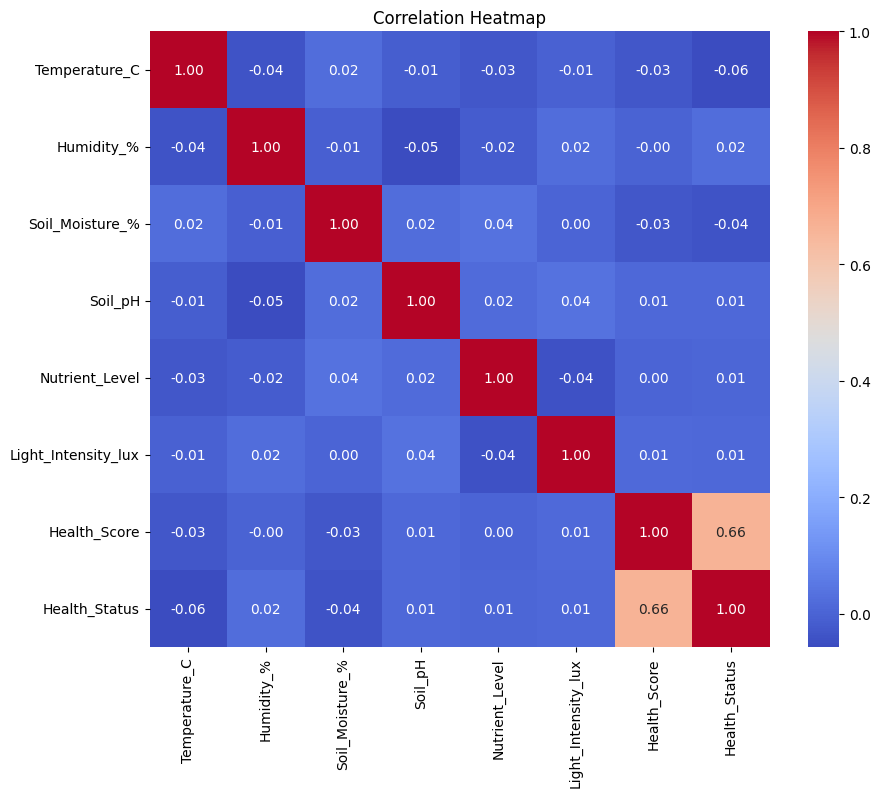

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Visualizations

Let's visualize the distribution of some key features and their relationship with the health score.

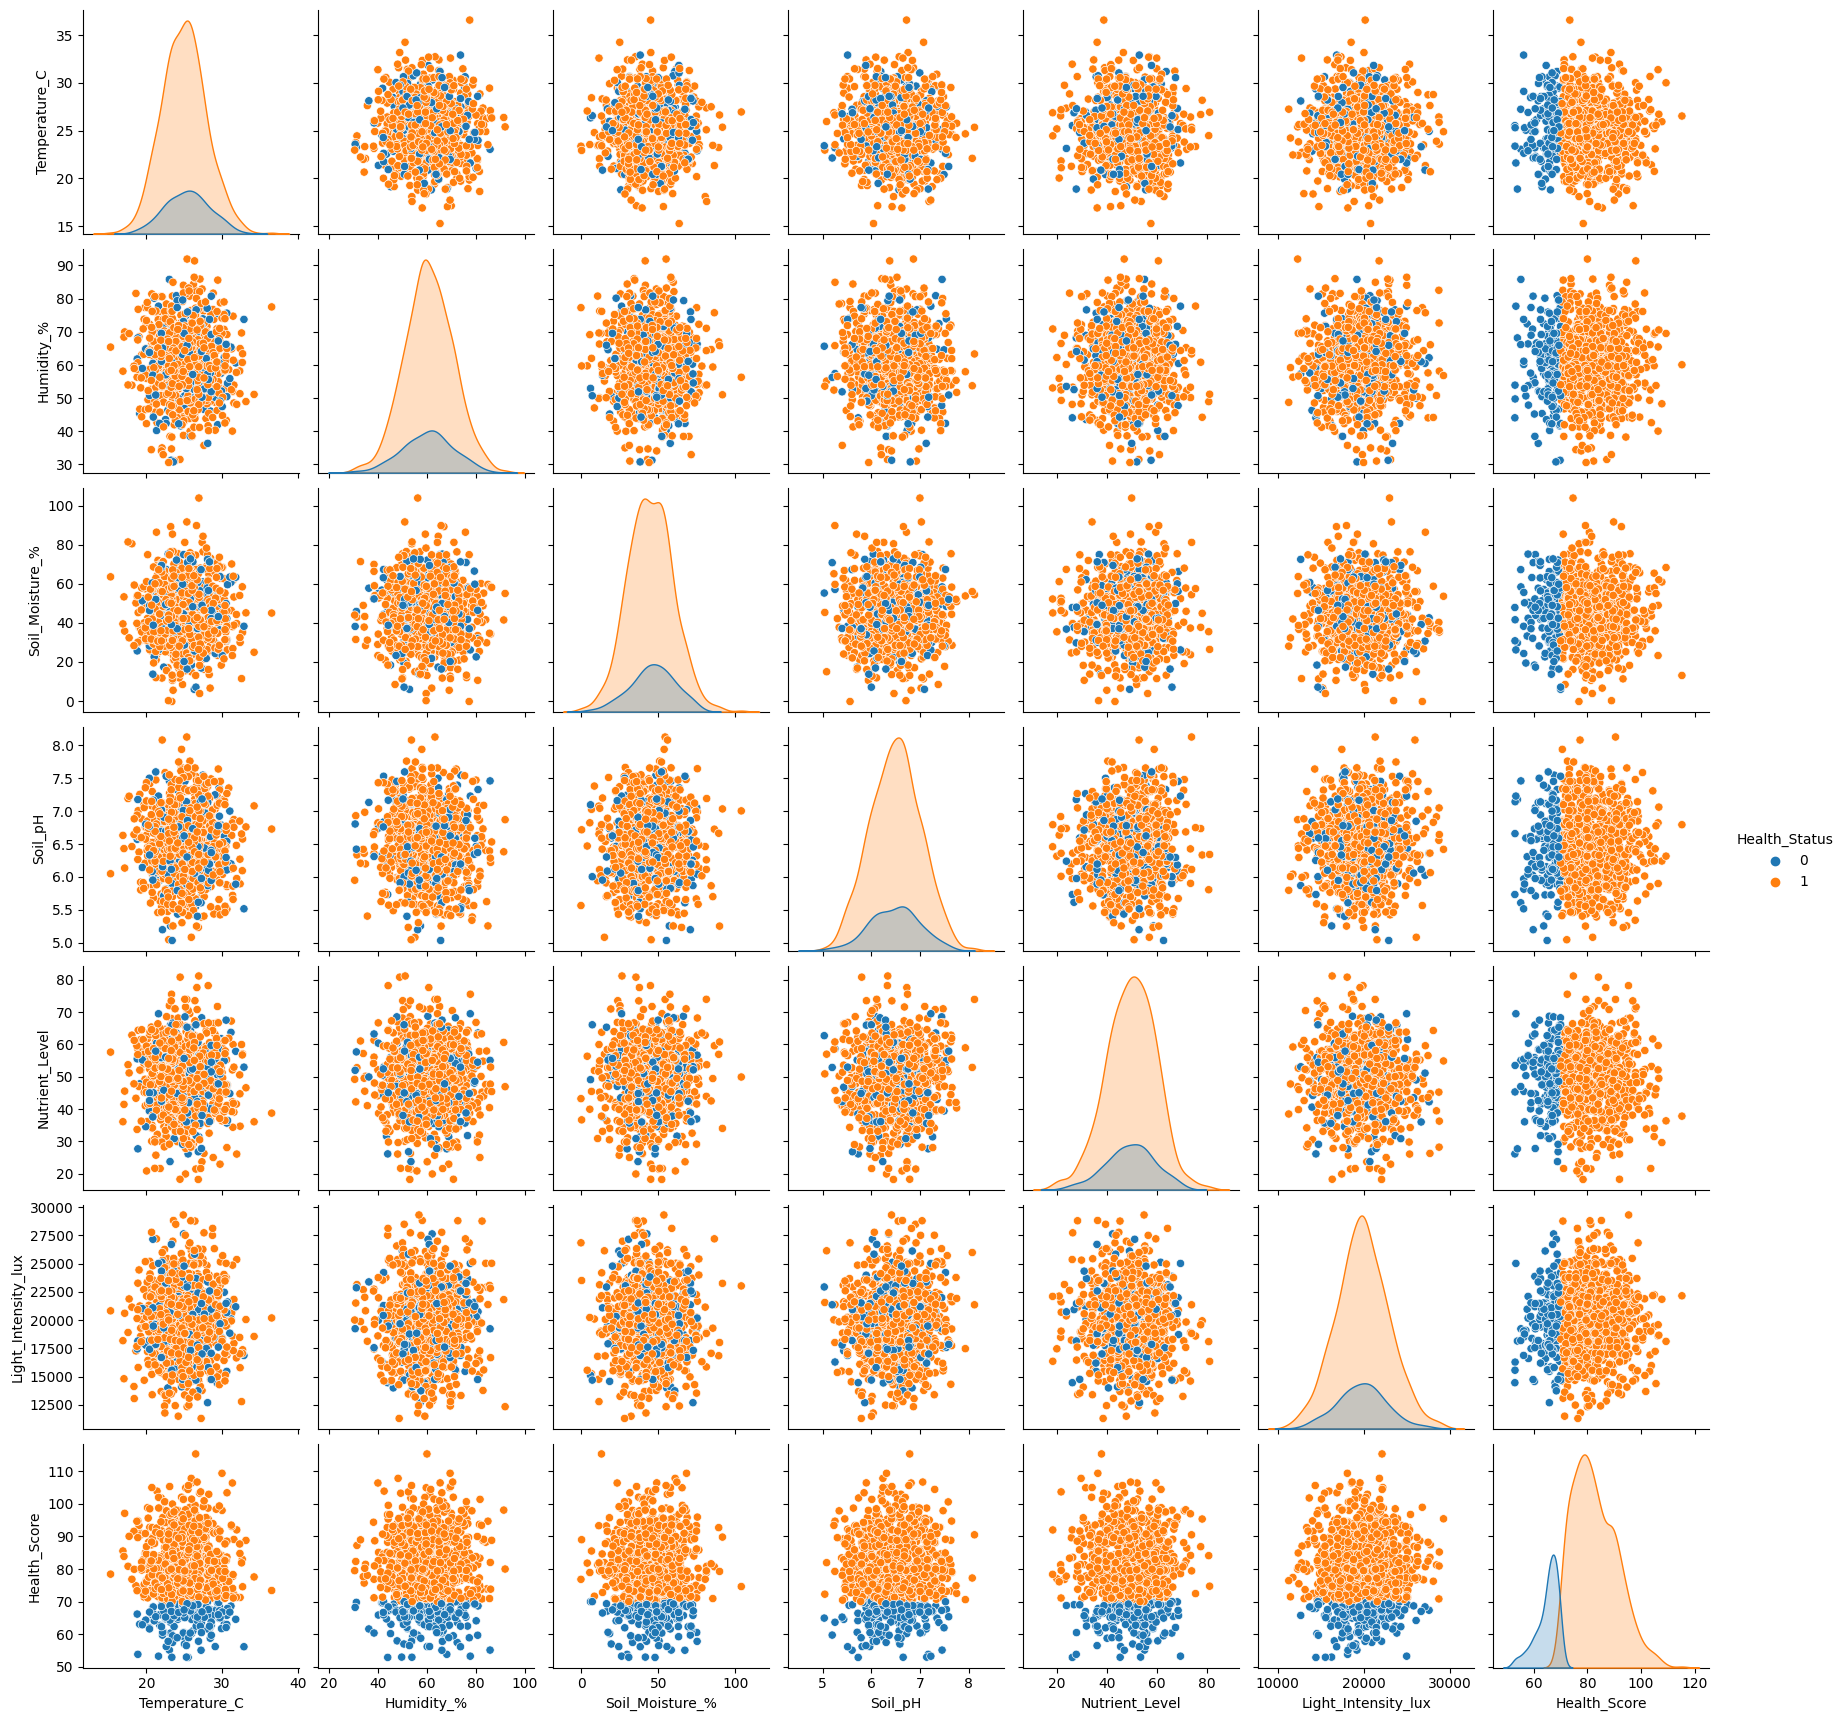

In [5]:
# Pair plot to visualize relationships
sns.pairplot(df, hue='Health_Status')
plt.show()

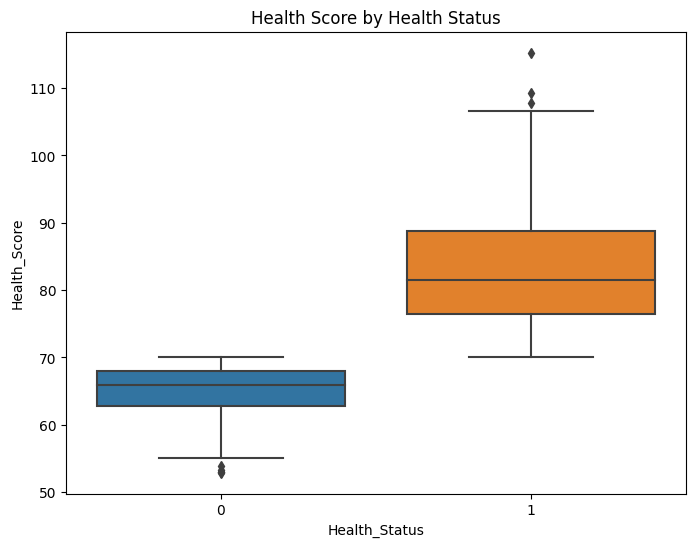

In [6]:
# Box plot for Health Score by Health Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Health_Status', y='Health_Score', data=df)
plt.title('Health Score by Health Status')
plt.show()

## Predictive Modeling

### Model Training

We'll build a simple classification model to predict the health status of the plants based on the available features.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target
X = df.drop(['Plant_ID', 'Health_Status'], axis=1)
y = df['Health_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

Let's evaluate the model's performance on the test set.

Accuracy: 1.00


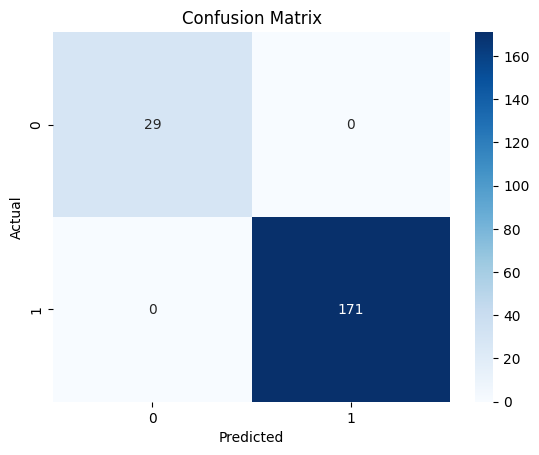

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       171

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

## Discussion and Future Work

In this notebook, we explored a dataset on plant health monitoring, performed exploratory data analysis, and built a predictive model to classify plant health status. The Random Forest model provided a reasonable accuracy, but there's always room for improvement. Future work could involve hyperparameter tuning, exploring other classification algorithms, or incorporating additional data sources to enhance the model's performance.

If you found this notebook insightful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)